IMPORTING LIBRARY

In [103]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

READ THE DATA SET

In [105]:
df=pd.read_csv('loan2.csv')

In [106]:
subset=df.loc[:,'loan_amnt':'cb_person_default_on_file']

In [107]:
df1=subset

In [125]:
df1

,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income,person_emp_length,cb_person_default_on_file
0,35000,16.02,1,0.59,3,59000,123,Y
1,1000,11.14,0,0.10,2,9600,5,N
2,5500,12.87,1,0.57,3,9600,1,N
3,35000,15.23,1,0.53,2,65500,4,N
4,35000,14.27,1,0.55,4,54400,8,Y
...,...,...,...,...,...,...,...,...
32576,5800,13.16,0,0.11,30,53000,1,N
32577,17625,7.49,0,0.15,19,120000,4,N
32578,35000,10.99,1,0.46,28,76000,3,N
32579,15000,11.48,0,0.10,26,150000,5,N


SPLITTING X AND Y 

In [108]:
x=df1.iloc[:,:7]

In [109]:
x


,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_income,person_emp_length
0,35000,16.02,1,0.59,3,59000,123
1,1000,11.14,0,0.10,2,9600,5
2,5500,12.87,1,0.57,3,9600,1
3,35000,15.23,1,0.53,2,65500,4
4,35000,14.27,1,0.55,4,54400,8
...,...,...,...,...,...,...,...
32576,5800,13.16,0,0.11,30,53000,1
32577,17625,7.49,0,0.15,19,120000,4
32578,35000,10.99,1,0.46,28,76000,3
32579,15000,11.48,0,0.10,26,150000,5


In [110]:
y=df1.iloc[:,7:].values

SPLITING TRAINING AND TEST DATA

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y.ravel(),test_size=0.2,random_state=0)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
st=StandardScaler()

In [115]:
x_train=st.fit_transform(x_train)

In [116]:
x_test=st.fit_transform(x_test)

In [117]:
x_train


array([[-0.72801377,  0.17310984, -0.53321711, ..., -0.93998538,
        -0.55188661, -0.16208507],
       [-1.3299034 ,  0.708681  , -0.53321711, ..., -0.69242535,
        -0.18720293,  0.7925156 ],
       [ 0.06394628,  0.61495605,  1.87540868, ...,  1.04049491,
        -0.56708176, -0.63938541],
       ...,
       [-0.09444573,  0.1998884 , -0.53321711, ..., -0.93998538,
        -0.4227278 , -0.87803558],
       [ 0.06394628, -2.21687647, -0.53321711, ..., -0.93998538,
        -0.36954477, -0.16208507],
       [ 0.21441869, -0.59007906, -0.53321711, ..., -0.93998538,
        -0.49110599,  0.55386543]])

In [118]:
import matplotlib.pyplot as plt
from sklearn import linear_model

IMPLEMENTATION USING SVM ALGORITHM

In [119]:
from sklearn.svm import SVC

In [120]:
classifier = SVC(kernel='linear', random_state = 1)
fit_reg=classifier.fit(x_train,y_train)

In [29]:
import numpy as np
print('Vector of Weights (w) = ',classifier.coef_[0])
print('b =',classifier.intercept_[0])
print('Indices of Support Vectors = ',classifier.support_)
print('Support vectors = ', classifier.support_vectors_)
print('Number of support vectors for each class = ', classifier.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(classifier.dual_coef_))

Vector of Weights (w) =  [ 4.21709940e-05  1.75215373e-05 -1.85068784e-05 -3.53242121e-05
 -5.98935588e-06  3.97528309e-06  4.30413746e-06]
b = -0.9999897826371081
Indices of Support Vectors =  [    3    15    18 ... 26052 26056 26060]
Support vectors =  [[ 2.43982641  2.52962295  1.87540868 ...  0.05025476  0.14465922
   0.0765651 ]
 [ 1.33108235  0.90282555 -0.53321711 ... -0.93998538  0.22306621
   0.55386543]
 [ 4.02374651 -2.21687647 -0.53321711 ... -0.69242535  0.96762872
   1.03116577]
 ...
 [-0.50626496 -2.21687647 -0.53321711 ...  1.04049491 -0.24798354
   2.70171695]
 [-1.2031898   1.26879917 -0.53321711 ...  2.03073506 -0.36954477
  -0.63938541]
 [-0.88640578  0.82025833 -0.53321711 ... -0.19730527 -0.47591084
   1.50846611]]
Number of support vectors for each class =  [4938 4629]
Coefficients of the support vector in the decision function =  [[1. 1. 1. ... 1. 1. 1.]]


In [121]:
Y_pred = classifier.predict(x_test)
Y_pred

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype=object)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(y_train)
print(y_test)

[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=1)

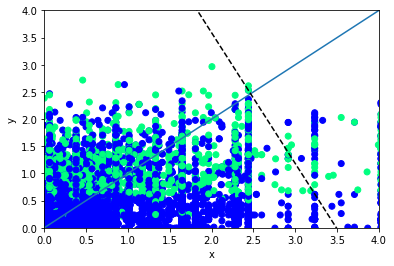

In [86]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='winter')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(range(0, 20))


scale_factor = 0.01

plt.xlim( [ 0, 4 ] )         
plt.ylim( [ 0, 4] )
w = classifier.coef_[0]
slope = -w[0]/w[1]
b = classifier.intercept_[0]
xx = np.linspace(xlim[0],xlim[1])
yy = slope * xx - (b/w[1])

#plot the margins
s = classifier.support_vectors_[0] # first support vector
yy_down = slope * xx +s[1] - slope * s[0]
s = classifier.support_vectors_[-1] #---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])

# plot the points
ax.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap='winter',marker='s')

# Plot the hyperplane
plt.plot(xx,yy,linewidth=2,color='green')

#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.show()


TO FIND THE ACCURACY OF THE ALGORITHM

In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Y_pred)

accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8287555623753261


TO PRINT THE CONFUSION MATRIX

In [124]:
cm

array([[5401,    0],
       [1116,    0]], dtype=int64)